In [1]:
import pandas as pd
import scanpy as sc
import scProject
import numpy as np
import random
import scipy

random.seed(613)

mousedataset = sc.read('/home/abaraban/conda_env/mouseRetinaData/mouseRetinaDataset.h5ad')
varAdd = pd.read_csv('/home/abaraban/conda_env/mouseRetinaData/10x_Mouse_retina_pData_umap2_CellType_annot.csv')
mousedataset.obs['umap2_CellType'] = varAdd['umap2_CellType'].values
dnorm = np.linalg.norm(mousedataset.X, axis=1, ord=1, keepdims=True)
dnormalized = mousedataset.X / (dnorm * .001)
mousedataset.X = dnormalized
patterns= sc.read('/home/abaraban/conda_env/hretinapatterns.csv')


scProject.matcher.orthologMapper(mousedataset, '/home/abaraban/conda_env/gene_map.csv', 'Mouse gene stable ID','Gene stable ID', 'id')
mousedataset_filtered, mousepatterns_filtered = scProject.matcher.filterAnnDatas(mousedataset, patterns.transpose(), 'id')

humandataset = sc.read('/home/abaraban/conda_env/humanRetinaData/humanRetinaDataset.h5ad')


dnorm = np.linalg.norm(humandataset.X, axis=1, ord=1, keepdims=True)
dnormalized = humandataset.X / (dnorm * .001)
humandataset.X = dnormalized
patterns= sc.read('/home/abaraban/conda_env/hretinapatterns.csv')

humandataset_filtered, humanpatterns_filtered = scProject.matcher.filterAnnDatas(humandataset, patterns.transpose(), 'id')




(107052, 1748) dataset filter shape
(97, 1748) patterns filter shape


Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.


(118555, 3113) dataset filter shape
(97, 3113) patterns filter shape


Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.


In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [60, 10]
mouse = mousedataset_filtered.var['gene_short_name']
mouse = pd.Series([x.lower() for x in mouse])
#genes = ['kcnv2','rpgrip1', 'aipl1', 'prph2', 'gngt2', 'impg1', 'tulp1', 'arl4d', 'gadd45g', 'crabp2', 'prdx1', 'tubb4b','eno2', 'rcvrn', 'dct', 'pdc', 'nrl', 'fam161a', 'vim', 'chrna3']
genes =  ['kcnv2', 'rpgrip1', 'impg1', 'dct', 'gadd45g', 'arl4d', 'mpp4', 'aipl1', 'fam161a', 'eps8', 'fstl5', 'prdx1', 'pde6g', 'chrna3', 'nipal1', 'rims2', 'dock8', 'crabp2', 'gngt2', 'pkib']
upper = [x.upper() for x in genes]
# print(mouse)
mousefilt = mouse.isin(genes)
# print(mousefilt)
topM= mousedataset_filtered[:,mousefilt].copy()

human = humandataset_filtered.var['gene_short_name']
human = pd.Series([x.lower() for x in human])
# print(human)
humanfilt = human.isin(genes)
# print(humanfilt)
topH = humandataset_filtered[:,humanfilt].copy()
topH.obs['umap2_CellType']=["Human-" + x for x in topH.obs['umap2_CellType']]
topM.obs['umap2_CellType']=["Mouse-" + x for x in topM.obs['umap2_CellType']]

#Log transform

topM.X = np.log2(topM.X+.03125)
topH.X = np.log2(topH.X +.03125)

print(np.max(topM.X), np.min(topM.X))
print(np.max(topH.X), np.min(topH.X))
#topM.X = scipy.stats.zscore(topM.X, axis=0)
#topH.X = scipy.stats.zscore(topH.X, axis=0)

#topM.X[topM.X > 5] = 5
#topH.X[topH.X > 5] = 5
#sc.pp.subsample(topM, n_obs=500)
#sc.pp.subsample(topH, n_obs=500)
#print(np.max(topM.X), np.min(topM.X))
#sc.pp.scale(topM)
#sc.pp.scale(topH)

dictionary = {'Mouse-Early RPCs':'Mouse-RPC', 'Mouse-Late RPCs' : 'Mouse-RPC'}
l = [dictionary.get(x, x) for x in topM.obs['umap2_CellType']]
topM.obs['umap2_CellType'] = l

dictH = {'Human-AC/HC_Precurs': 'Human-Photoreceptor Precursors','Human-BC/Photo_Precurs':'Human-Photoreceptor Precursors'}
h = [dictH.get(x, x) for x in topH.obs['umap2_CellType']]
topH.obs['umap2_CellType'] = h

adata = topH.concatenate(topM)
adata.var.index = adata.var['gene_short_name-0'].values
orderSeparate = ['Human-RPCs', 'Human-Retinal Ganglion Cells',
       'Human-Neurogenic Cells', 'Human-Cones', 'Human-Rods',
       'Human-Photoreceptor Precursors', 'Human-Horizontal Cells',
       'Human-Amacrine Cells', 'Human-Bipolar Cells', 
       'Human-Muller Glia', 'Mouse-RPC', 'Mouse-Retinal Ganglion Cells','Mouse-Neurogenic Cells','Mouse-Cones','Mouse-Rods','Mouse-Photoreceptor Precursors',
       'Mouse-Horizontal Cells','Mouse-Amacrine Cells', 'Mouse-Bipolar Cells',
       'Mouse-Muller Glia']

adata.obs['umap2_CellType']=adata.obs['umap2_CellType'].astype('category').cat.reorder_categories(orderSeparate, ordered=True)
#ax = sc.pl.heatmap(adata, adata.var.index, groupby='umap2_CellType', dendrogram=False,
#              swap_axes=True, save="FinalDraft", show=False )





5.905425 -5.0
4.9891353 -5.0


In [3]:
l = adata.copy()

/home/abaraban/anaconda3/envs/scProjections/lib/python3.7/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
l.obs.index = l.obs['umap2_CellType']

In [5]:
l.obs['umap2_CellType']=l.obs['umap2_CellType'].astype('category').cat.reorder_categories(orderSeparate, ordered=True)
l.obs['umap2_CellType']

umap2_CellType
Human-RPCs                      Human-RPCs
Human-RPCs                      Human-RPCs
Human-RPCs                      Human-RPCs
Human-RPCs                      Human-RPCs
Human-RPCs                      Human-RPCs
                              ...         
Mouse-Rods                      Mouse-Rods
Mouse-Bipolar Cells    Mouse-Bipolar Cells
Mouse-Rods                      Mouse-Rods
Mouse-Bipolar Cells    Mouse-Bipolar Cells
Mouse-Bipolar Cells    Mouse-Bipolar Cells
Name: umap2_CellType, Length: 225607, dtype: category
Categories (20, object): ['Human-RPCs' < 'Human-Retinal Ganglion Cells' < 'Human-Neurogenic Cells' < 'Human-Cones' ... 'Mouse-Horizontal Cells' < 'Mouse-Amacrine Cells' < 'Mouse-Bipolar Cells' < 'Mouse-Muller Glia']

In [6]:
adata.obs['umap2_CellType'].unique()

['Human-RPCs', 'Human-Retinal Ganglion Cells', 'Human-Neurogenic Cells', 'Human-Cones', 'Human-Photoreceptor Precursors', ..., 'Mouse-Bipolar Cells', 'Mouse-Horizontal Cells', 'Mouse-Cones', 'Mouse-Rods', 'Mouse-Muller Glia']
Length: 20
Categories (20, object): ['Human-RPCs' < 'Human-Retinal Ganglion Cells' < 'Human-Neurogenic Cells' < 'Human-Cones' ... 'Mouse-Horizontal Cells' < 'Mouse-Amacrine Cells' < 'Mouse-Bipolar Cells' < 'Mouse-Muller Glia']

In [7]:
x = l.to_df().index.reorder_categories(orderSeparate, ordered=True)

In [8]:
import seaborn as sns
l.obs.index = l.obs['umap2_CellType']
x = l.to_df().sort_index()
lut = dict(zip(x.index.unique(), sns.hls_palette(len(x.index.unique()), l=0.5, s=0.8)))

In [9]:
row_colors = [lut.get(z) for z in x.index]

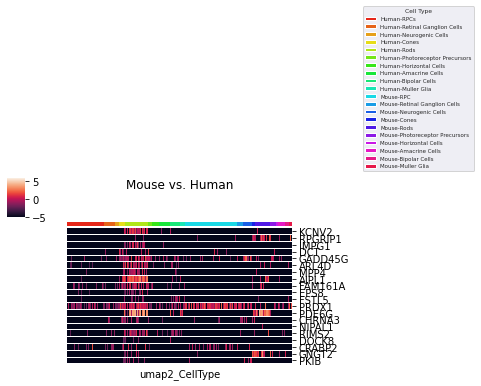

In [10]:
cluster = sns.clustermap(x[upper].transpose(), row_cluster=False, col_cluster=False, col_colors=row_colors, figsize=(5, 3),yticklabels=1, xticklabels=False)
cluster.fig.suptitle('Mouse vs. Human') 
from matplotlib.patches import Patch
sns.set(font_scale=.5)
handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Cell Type',
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='lower left')
cluster.savefig("RCDONEPRESENTATIONWlegend", dpi=600)

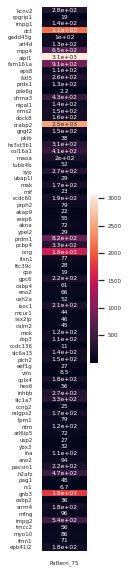

In [11]:
fullGenes = ['kcnv2', 'rpgrip1', 'impg1', 'dct', 'gadd45g', 'arl4d', 'mpp4', 'aipl1', 'fam161a', 'eps8', 'fstl5',
             'prdx1', 'pde6g', 'chrna3', 'nipal1', 'rims2', 'dock8', 'crabp2', 'gngt2', 'pkib', 'hs3st3b1', 'col16a1',
             'maoa', 'tubb4b', 'syp', 'ubap1l', 'mak', 'mif', 'ccdc60', 'prph2', 'akap9', 'reep6', 'akna', 'ypel2',
             'prdm1', 'pcbp4', 'rxrg', 'itsn1', 'ttc39c', 'cpe', 'gpc6', 'cabp4', 'eno2', 'ush2a', 'isoc1', 'mcur1', 'ssx2ip',
             'calm2', 'mok', 'rbp3', 'ccdc136', 'slc6a15', 'plch2', 'eef1g', 'vim', 'cplx4', 'hes6', 'inhbb', 'slc1a7', 'ccng2',
             'ralgps2', 'tpm1', 'ntm', 'arl6ip5', 'usp2', 'ybx3', 'ina', 'ano2', 'pacsin1', 'h2afz', 'pag1', 'rs1',
             'gnb3', 'osbp2', 'srrm4', 'mfng', 'impg2', 'tmcc2', 'myo10', 'fmn1', 'epb41l2']
shorttoID = dict(zip(humandataset_filtered.var['gene_short_name'], humandataset_filtered.var.index))
ensembleGenes = [shorttoID.get(x.upper()) for x in fullGenes]
convert = dict(zip(genes, ensembleGenes))
feature = humanpatterns_filtered[74, :]
# construct weighted Mean Difference using specified feature
curNorm = np.linalg.norm(feature.X, ord=1)
numNonzero = np.count_nonzero(feature.X)
normalized = feature.X * (numNonzero / curNorm)
feature.X = normalized

x = feature.to_df()[ensembleGenes]
x.columns = fullGenes
plt.figure(figsize = (1,10))
sns.heatmap(x.transpose(), annot=True)
plt.yticks(rotation=0) 
plt.savefig('Pattern75WeightNorm.pdf', bbox_inches='tight')

98.04
82.69
94.8
99.94
93.22
94.47
99.49
100.0
99.74
93.93
97.59
94.57
71.76
99.23
95.05
95.5
95.76
99.97
95.34
87.47
98.3
99.16
96.85
89.43
97.72
85.71
95.95
84.07
96.63
91.68
83.97
89.72
91.36
85.83
99.68
98.43
99.84
91.52
85.45
82.85
97.08
90.4
90.84
89.37
97.01
88.24
88.44
88.37
94.31
93.86
79.83
95.15
95.37
85.22
78.73
96.31
89.85
97.75
98.49
84.55
96.21
91.65
94.06
91.33
85.26
86.35
93.67
92.77
97.17
99.29
88.92
77.64
99.87
87.18
96.4
92.93
99.36
89.78
92.39
91.29
96.34


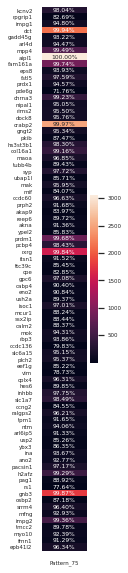

In [12]:
from scipy import stats
x = feature.to_df()[ensembleGenes]
x.columns = fullGenes
percentiles = np.zeros((81,1))
counter = 0
for i in x.values[0]:
    print(round(stats.percentileofscore(feature.X[0], i),2))
    percentiles[counter] = round(stats.percentileofscore(feature.X[0], i),2)/100.0
    counter+=1
    
plt.figure(figsize = (1,10))
sns.heatmap(x.transpose(), annot=np.array(percentiles), fmt= '.2%')
plt.yticks(rotation=0) 
plt.savefig('Pattern75WeightNormPercentiles.pdf', bbox_inches='tight')